In [363]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
import math

sns.set(rc={'figure.figsize':(15, 6)})

In [123]:
def preprocess(df):
    """Preprocess data for KMeans clustering"""
    
    #df_log = np.log1p(df)
    scaler = StandardScaler()
    scaler.fit(df)
    df_norm = scaler.transform(df)
    
    return df_norm

In [124]:
def elbow_plot(df):
    """Create elbow plot from normalized data"""
    
    df_norm = preprocess(df)
    
    sse = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df_norm)
        sse[k] = kmeans.inertia_
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()

In [125]:
def find_k(df, increment=0, decrement=0):
    """Find the optimum k clusters"""
    
    df_norm = preprocess(df)
    sse = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df_norm)
        sse[k] = kmeans.inertia_
    
    kn = KneeLocator(x=list(sse.keys()), 
                 y=list(sse.values()), 
                 curve='convex', 
                 direction='decreasing')
    k = kn.knee + increment - decrement
    return k

In [126]:
def run_kmeans(df, increment=0, decrement=0):
    """Run KMeans clustering, including the preprocessing of the data
    and the automatic selection of the optimum k. 
    """
    
    df_norm = preprocess(df)
    k = find_k(df, increment, decrement)
    kmeans = KMeans(n_clusters=k, 
                    random_state=1)
    kmeans.fit(df_norm)
    return df.assign(cluster=kmeans.labels_)

In [238]:
df = pd.read_csv('missesTotal.csv')  

In [239]:
df

,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,emb_1,emb_2,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,0,813,neutral,@united I hope so too,0,813,1,0.701212,0.149414,1.801739,...,-0.641708,-0.631561,0.724360,-0.479683,0.342981,-0.128573,-0.765833,-0.322237,-0.484272,-0.027367
1,1,7130,neutral,@jetblue who's running your tweeter using the ...,0,7130,2,-0.095302,0.519799,-0.860941,...,-0.844507,0.545532,-0.988797,-0.470753,0.221976,-0.781311,0.437286,0.007654,-0.176711,0.090562
2,2,3380,neutral,@united still waiting for a response on whethe...,0,3380,2,0.404428,-0.281564,1.098605,...,0.027952,-0.336490,-0.060362,-0.929268,0.410162,0.116782,-0.160092,-0.028493,-0.795741,0.037037
3,3,3008,neutral,@united Based on suggestions from other passen...,0,3008,2,0.580564,-0.417264,0.539577,...,-0.246741,-1.197115,-0.562455,-0.443025,-0.123202,-0.652523,-0.151871,0.264033,-0.452444,-0.366747
4,4,7030,neutral,“@JetBlue: Our fleet's on fleek. http://t.co/Q...,0,7030,2,0.150641,0.191832,0.901386,...,-0.277474,-0.263758,0.017206,-0.703940,-0.521036,0.051719,0.339595,0.206907,-0.883897,0.368364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,963,4377,positive,@SouthwestAir @heavenlychc9 I'd at least enjoy...,1,4377,0,-0.288926,-0.469544,0.763421,...,-0.027024,-1.082415,-0.697840,-0.485712,-0.417425,0.451793,-0.545403,-0.404581,-0.650430,0.245911
964,964,5512,positive,@SouthwestAir I'll have to drop by next time I...,1,5512,0,-0.287779,-0.133505,1.637628,...,-0.028515,-0.204185,-0.278846,0.153048,-0.024744,0.142459,-0.391037,-0.188013,-0.114064,0.296878
965,965,56,positive,@VirginAmerica you know it. Need it on my spot...,1,56,0,-0.120062,0.689700,0.500194,...,-0.449935,-0.235210,-0.653002,-1.018101,-0.308710,-0.254051,-0.067138,0.288422,-0.103543,-0.275301
966,966,6239,positive,@SouthwestAir I'm really craving your pretzels...,1,6239,0,-0.466340,0.289625,-0.217530,...,-0.224040,-0.835734,-0.458101,-1.050726,-0.012579,0.600473,-0.229492,0.395023,-0.019480,0.537425


In [240]:
df2 = df[["emb_" + str(i) for i in range(768)]]

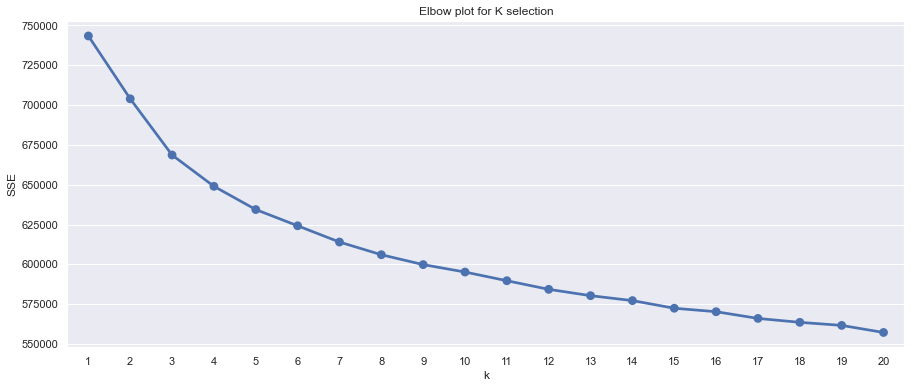

In [241]:
elbow_plot(df2)

In [242]:
find_k(df2)

7

In [243]:
df3 = run_kmeans(df2)

In [244]:
df['cluster'] = df3["cluster"].to_numpy()

In [245]:
df

,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,emb_1,emb_2,...,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767,cluster
0,0,813,neutral,@united I hope so too,0,813,1,0.701212,0.149414,1.801739,...,-0.631561,0.724360,-0.479683,0.342981,-0.128573,-0.765833,-0.322237,-0.484272,-0.027367,3
1,1,7130,neutral,@jetblue who's running your tweeter using the ...,0,7130,2,-0.095302,0.519799,-0.860941,...,0.545532,-0.988797,-0.470753,0.221976,-0.781311,0.437286,0.007654,-0.176711,0.090562,1
2,2,3380,neutral,@united still waiting for a response on whethe...,0,3380,2,0.404428,-0.281564,1.098605,...,-0.336490,-0.060362,-0.929268,0.410162,0.116782,-0.160092,-0.028493,-0.795741,0.037037,5
3,3,3008,neutral,@united Based on suggestions from other passen...,0,3008,2,0.580564,-0.417264,0.539577,...,-1.197115,-0.562455,-0.443025,-0.123202,-0.652523,-0.151871,0.264033,-0.452444,-0.366747,5
4,4,7030,neutral,“@JetBlue: Our fleet's on fleek. http://t.co/Q...,0,7030,2,0.150641,0.191832,0.901386,...,-0.263758,0.017206,-0.703940,-0.521036,0.051719,0.339595,0.206907,-0.883897,0.368364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,963,4377,positive,@SouthwestAir @heavenlychc9 I'd at least enjoy...,1,4377,0,-0.288926,-0.469544,0.763421,...,-1.082415,-0.697840,-0.485712,-0.417425,0.451793,-0.545403,-0.404581,-0.650430,0.245911,0
964,964,5512,positive,@SouthwestAir I'll have to drop by next time I...,1,5512,0,-0.287779,-0.133505,1.637628,...,-0.204185,-0.278846,0.153048,-0.024744,0.142459,-0.391037,-0.188013,-0.114064,0.296878,0
965,965,56,positive,@VirginAmerica you know it. Need it on my spot...,1,56,0,-0.120062,0.689700,0.500194,...,-0.235210,-0.653002,-1.018101,-0.308710,-0.254051,-0.067138,0.288422,-0.103543,-0.275301,5
966,966,6239,positive,@SouthwestAir I'm really craving your pretzels...,1,6239,0,-0.466340,0.289625,-0.217530,...,-0.835734,-0.458101,-1.050726,-0.012579,0.600473,-0.229492,0.395023,-0.019480,0.537425,0


In [249]:
arr_emb = df2.to_numpy()

In [250]:
import umap

In [251]:
mapper = umap.UMAP().fit(arr_emb)
twod = mapper.transform(arr_emb)
twod.shape

(968, 2)

In [252]:
df["x"] = twod[:, 0]
df["y"] = twod[:, 1]

In [424]:
import plotly.express as px

fig = px.scatter(
    df.loc[(df["label"] == "negative") & (df["cluster"] == 4)], x='x', y='y', color='cluster', hover_data=['x', 'y', 'text', 'label', 'cluster', 'predicted_label'])

fig.show()

In [425]:
cluster = 4
label = "negative"


In [426]:
for i in df.loc[(df["label"] == label) & (df["cluster"] == cluster)]["text"].to_numpy():
    print(i + '\n')

@AmericanAir having trouble Flight Booking Problems a seat on US84 11 March, operated by AA. Neither airline's website will allow seat selection?

@USAirways I do to as I have an afternoon Conference in Las Vegas and I would rather plan ahead than run thru the airport and then attempt

@AmericanAir for tomorrow some sites show flight 1642 from ewr Cancelled Flightled, is it?

@USAirways I don't think I've ever had a us airways flight that went smoothly.

@USAirways are the bags off Flight 1898 CLT to JFK? We landed last night just before midnight.

@VirginAmerica you're the best!! Whenever I (begrudgingly) use any other airline I'm delayed and Late Flight :(

@SouthwestAir I left my iPad on my flight 1831 from ERW to DEN. I opened claim 442998. It has so many memories on it. Plz help get it back.

@JetBlue is JFK still closed? Tryna get out of Ft Lauderdale on flight 502, just want to get home to nyc!

@AmericanAir  when do you anticipate decisions for Cancelled Flightlations at DFW to

In [404]:
queries = ["@Delta, take some notes from @JetBlue on how to treat customers right. #CustomerServiceGoals",
"Just booked my next flight with @JetBlue and couldn't be more excited! #JetBlueLove",
"I always have a great experience flying with @JetBlue. Thanks for making travel comfortable and easy!",
"Flying with @JetBlue to my favorite city - can't wait to explore! #TravelGoals",
"@JetBlue, you're killing the airline game with your on-point fleet and exceptional service. Keep it up! #AirlineGoals",
"Every time I fly @JetBlue, I'm reminded of why I choose this airline. Amazing service, great prices, and comfortable flights!",
"I may not have my tux, but I'm always ready for a flight with @JetBlue. #JetBlueLove",
"Just when I thought I couldn't love @JetBlue any more, they offer a flight from my hometown to my favorite city! #Winning",
"From Boston to Buffalo to the Caribbean, @JetBlue takes me wherever I need to go. #JetBlueLove",
"@JetBlue, can you please offer service to my hometown? I need to share the love with my community!",
"I love when my flights are on fleek, just like @JetBlue's fleet! #TravelGoals",
"No need to stop the tweets, @JetBlue. Keep them coming! #JetBlueLove",
"Excited to fly with @JetBlue again and experience their amazing customer service! #AirlineGoals",
"Thanks to @JetBlue, I'm always ready for my next adventure. #JetBlueLove",
"When it comes to air travel, @JetBlue is always my first choice. #AirlineGoals",
"The only thing that could make my flight with @JetBlue better is if I get a chance to snap a selfie with the crew! #JetBlueLove",
"Thanks, @JetBlue, for always making my travels comfortable and fun. #TravelGoals",
"Just when I thought @JetBlue couldn't get any better, they surprise me with amazing on-board entertainment! #AirlineGoals",
"Nothing but love for @JetBlue! Best airline around! #JetBlueLove",
"I'm so ready to trade the cold for a sunny destination with @JetBlue. #TravelGoals",
"Shoutout to @JetBlue for the best flight experience ever! #AirlineGoals",
"Boarding with @JetBlue is always a breeze, thanks to their amazing agents! #JetBlueLove",
"Thanks, @JetBlue, for always making me feel like a VIP. #TravelGoals",
"I can always count on @JetBlue for an amazing flight experience. #AirlineGoals",
"I'm always excited to see @JetBlue's planes pulling into the gate - it means I'm in for a great flight! #JetBlueLove",
"When it comes to flying, @JetBlue is always the way to go. #TravelGoals",
"I'm convinced that @JetBlue has the best customer service in the airline industry. #AirlineGoals",
"I never have to worry about legroom when I fly with @JetBlue - even more space for me to relax! #JetBlueLove",
"Thanks, @JetBlue, for making my travel dreams come true! #TravelGoals",
"I'm always impressed by @JetBlue's innovative approach to air travel. #AirlineGoals",
"Flying with @JetBlue feels like a luxury experience at an affordable price. #JetBlueLove",
"Thanks to @JetBlue, I'm always ready to jet off to my next adventure. #TravelGoals",]
# neu 0[
# "@SouthwestAir the weather always seems to cause flight delays, it's so frustrating #flightdelays #travelwoes",
# "@SouthwestAir thank you for your assistance, Lindsey. Do you have any updates on my flight? #stuckindenver",
# "@SouthwestAir glad to hear everything is sorted out, thank you! #goodcustomerservice",
# "@SouthwestAir I agree, more incentives for border town flyers would be great for everyone involved #customerretention #travelmore",
# "@SouthwestAir missing a flight by a millisecond is a sad feeling, better luck next time #missedopportunities #flying",
# "@SouthwestAir it can be confusing for first-time flyers, but boarding by row makes more sense. #traveltips #flying",
# "@SouthwestAir any chance you could get my hubby home sooner? He's got a long layover in DFW #travelwoes #flights",
# "@SouthwestAir thanks for the heads up on the wait times at PHX airport, I'll keep that in mind next time I fly #travelhacks #travel",
# "@SouthwestAir glad to hear the flight took off on time! #goodnews #travel",
# "@SouthwestAir please bring back the RDU to FLL route, it's always so packed! #travelneeds #flying",
# "@SouthwestAir great travel tips, thanks for sharing! #traveltips #ebook",
# "@SouthwestAir thanks for the reminder about my upcoming trip, even though I didn't need it #travelupdates #traveltweets",
# "@SouthwestAir any updates on flights from BWI-SJD after Aug 7th? Can't seem to find any #travelwoes #flying",
# "@SouthwestAir @love_dragonss Lauren, you're amazing!",
# "@SouthwestAir just checking in to make sure everything's alright, there's been a threat on the plane #safetyconcerns #travel",
# "@SouthwestAir boarding could be much smoother if you let the business class go first #boardingprocess #travelwoes",
# "@SouthwestAir is there a way to upgrade to priority seating after purchasing the flight? #travelquestions #flying",
# "@SouthwestAir going over 9000 feet in the air feels incredible! #travelling #flyinghigh",
# "@SouthwestAir thanks for the reply, I appreciate it #goodcustomerservice #travelwoes",
# "@SouthwestAir @ClinicPolly thank you for responding, even though I might have missed it #grateful #travelwoes",
# "@SouthwestAir @destinationdragons is the dream! It would be a life-changing experience to see them perform #dreamscometrue #musiclove",
# "@SouthwestAir everything's rebooked for tomorrow, fingers crossed for a smooth flight #travelupdates #traveltweets",
# "@SouthwestAir please help these volunteers from RI high school get home! #goodcause #travelwoes",
# "@SouthwestAir can you help me find a flight under $150 from Nashville to DC or Raleigh on March 15th? #travelrequests #flying",
# "@SouthwestAir been on hold for almost 30 minutes, still no response #customerservicefail #travelwoes",
# "@SouthwestAir @love_dragonss Lauren, you're the best!",
# "@SouthwestAir always coming to the rescue, thanks for being so reliable! #travelwoes #customerservice",
# "@SouthwestAir I can't enroll in the Atlanta companion promotion, can you help me out? #traveldeals #promotions",
# "@SouthwestAir direct message me, I need help with a rebooking #travelupdates #traveltweets"]
#neu 3 ["@united Glad to hear it!", "@USAirways Apology accepted!", "@united Happy to hear that everything got straightened out!", "@united Thank you for the prompt responses, much appreciated!", "@USAirways You're welcome!", "@united Sounds good, thanks for the update.", "@united Hope you make your connection!", "@united Looking forward to hearing from you.", "@united Thank you for submitting your feedback!", "@united Looking forward to seeing what you do to make up for it!", "@USAirways Get it together, guys!", "@united Hi there, thanks for the response!", "@united No problem, glad we could help!", "@united Thanks, keep us posted!", "@united Thanks for the clarification, appreciate it!", "@united Will do, thanks for the info!", "@USAirways Thank you as well!", "@united Hoping you have a comfortable flight!", "@united Definitely appreciate your help!", "@united Thank you for your response, much appreciated!", "@united Crossing my fingers for a response!", "@united Thanks for keeping us in the loop!", "@united Shoutout to @Delta for saving the day!", "@united Thanks for the update, much appreciated!", "@USAirways No problem, glad we could help!", "@USAirways Glad to hear you got your bags back!", "@USAirways It's all good, thanks for the help!", "@USAirways Same here, lol.", "@united Thank you, appreciate it!", "@united Thanks a bunch!", "@united Sounds like a frustrating situation, hope it gets resolved soon!", "@united Thank you, looking forward to your response!", "@united Awesome, thanks so much for your help!"]

In [405]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('stsb-bert-base')

In [406]:
query_vec = sbert_model.encode(queries)

In [407]:
query_vec

array([[-0.31735054, -0.06192292,  0.68513393, ...,  0.46849802,
        -0.7498029 ,  0.10763265],
       [-0.3037662 , -0.2401653 ,  0.39343467, ..., -0.61425567,
        -0.3385205 ,  0.10085715],
       [-0.6493553 ,  0.20184685,  0.23286082, ...,  0.3165996 ,
        -0.3656224 , -0.07425155],
       ...,
       [-0.32352802,  0.10114474,  0.35835433, ...,  0.01405708,
        -0.2661058 , -0.60129255],
       [-0.42486373, -0.09639287, -0.04111897, ..., -0.17147808,
         0.01991454, -0.20275812],
       [-0.4209722 , -0.45257902,  1.3405172 , ..., -0.7080294 ,
        -0.99233395,  0.03415997]], dtype=float32)

In [408]:
newtwos = mapper.transform(query_vec)

In [409]:
newtwos

array([[ 1.4592757 , 13.396656  ],
       [ 0.785355  , 15.458619  ],
       [ 0.20249054, 14.084254  ],
       [ 0.7741375 , 14.403414  ],
       [ 2.677878  , 15.113489  ],
       [ 0.57134813, 13.854948  ],
       [ 1.4493403 , 16.26016   ],
       [ 1.7092354 , 13.997145  ],
       [ 1.3851854 , 16.02732   ],
       [ 0.19239967, 14.015298  ],
       [ 0.60102034, 14.791024  ],
       [ 2.1650586 , 15.982483  ],
       [ 0.21337382, 13.889885  ],
       [ 0.57612413, 15.270318  ],
       [ 0.77131   , 15.917017  ],
       [ 0.69859034, 14.49887   ],
       [ 0.21393698, 14.102901  ],
       [ 1.7029054 , 14.482591  ],
       [ 0.1853591 , 14.25293   ],
       [ 1.1914401 , 14.035684  ],
       [ 0.43869558, 14.851498  ],
       [ 0.19478008, 14.176585  ],
       [ 0.14883617, 14.059335  ],
       [ 0.3972034 , 14.941033  ],
       [ 0.6784175 , 14.353399  ],
       [ 0.8632879 , 16.08528   ],
       [ 0.32770398, 14.092314  ],
       [ 0.9118636 , 13.446322  ],
       [ 0.11388399,

In [410]:
dfnew = df.loc[(df["label"] == label) & (df["cluster"] == cluster)][["x", "y"]]
dfnew

,x,y
330,2.090349,15.902088
335,1.559397,15.080293
337,2.169317,14.253313
340,1.745250,15.806063
343,2.710168,15.552733
344,1.332092,15.875604
352,1.449768,15.402312
372,1.850128,15.842518
374,1.767257,15.868396
380,1.370262,15.032060


In [411]:
dfnew["type"] = ["og"] * dfnew.shape[0]
dfnewtwos = pd.DataFrame(newtwos, columns=["x", "y"])
dfnewtwos["type"] = ["new"] * dfnewtwos.shape[0]
dfnewtwos

,x,y,type
0,1.459276,13.396656,new
1,0.785355,15.458619,new
2,0.202491,14.084254,new
3,0.774137,14.403414,new
4,2.677878,15.113489,new
5,0.571348,13.854948,new
6,1.449340,16.260160,new
7,1.709235,13.997145,new
8,1.385185,16.027321,new
9,0.192400,14.015298,new


In [412]:
fig = px.scatter(
    pd.concat([dfnew, dfnewtwos]), color="type", x='x', y='y')

fig.show()

In [413]:
x_avg, y_avg = dfnew.mean(axis=0)
refarr = np.array([x_avg, y_avg])

/var/folders/8t/119qytm92x1gj5w2__d4vj800000gn/T/ipykernel_78342/1963335029.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [414]:
distances = []

for b in newtwos:
    distances.append(np.linalg.norm(b - refarr))
    
distances = np.array(distances)

In [415]:
sorted_x = np.argsort(distances)
filtered = [queries[i] for i in sorted_x[:-math.ceil(sorted_x.shape[0]*0.1)]]
filtered

['From Boston to Buffalo to the Caribbean, @JetBlue takes me wherever I need to go. #JetBlueLove',
 'No need to stop the tweets, @JetBlue. Keep them coming! #JetBlueLove',
 "I may not have my tux, but I'm always ready for a flight with @JetBlue. #JetBlueLove",
 "Just booked my next flight with @JetBlue and couldn't be more excited! #JetBlueLove",
 'When it comes to flying, @JetBlue is always the way to go. #TravelGoals',
 'When it comes to air travel, @JetBlue is always my first choice. #AirlineGoals',
 "Thanks to @JetBlue, I'm always ready to jet off to my next adventure. #TravelGoals",
 "@JetBlue, you're killing the airline game with your on-point fleet and exceptional service. Keep it up! #AirlineGoals",
 "Just when I thought @JetBlue couldn't get any better, they surprise me with amazing on-board entertainment! #AirlineGoals",
 "Thanks to @JetBlue, I'm always ready for my next adventure. #JetBlueLove",
 "I love when my flights are on fleek, just like @JetBlue's fleet! #TravelGoals"

In [416]:
dataAppend = pd.DataFrame(filtered, columns=["text"])
dataAppend["label"] = [label] * dataAppend.shape[0]
dataAppend

,text,label
0,"From Boston to Buffalo to the Caribbean, @JetB...",positive
1,"No need to stop the tweets, @JetBlue. Keep the...",positive
2,"I may not have my tux, but I'm always ready fo...",positive
3,Just booked my next flight with @JetBlue and c...,positive
4,"When it comes to flying, @JetBlue is always th...",positive
5,"When it comes to air travel, @JetBlue is alway...",positive
6,"Thanks to @JetBlue, I'm always ready to jet of...",positive
7,"@JetBlue, you're killing the airline game with...",positive
8,Just when I thought @JetBlue couldn't get any ...,positive
9,"Thanks to @JetBlue, I'm always ready for my ne...",positive


In [417]:
dataAppend.to_csv('newpoints.csv', mode="a", index=False)

In [82]:
df.loc[df['label'] == 'positive']

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,...,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767,cluster,x,y
324,324,324,324,6840,positive,sooo earlier i said i couldnt fly with you fo...,1,6840,0,-0.155660,...,-1.191289,-0.302810,-0.148592,-0.177926,0.054763,-0.010817,0.627878,5,3.395363,15.495116
325,325,325,325,13384,positive,thanks hoping that by wed I can get back to DFW,1,13384,0,0.778993,...,0.128634,0.230073,0.081046,-0.708278,-0.784081,-0.363848,0.637311,0,0.110970,16.098774
326,326,326,326,2768,positive,all good man it isn't your fault that plane i...,1,2768,2,0.129607,...,-2.403039,-0.656652,0.019882,0.399017,0.637847,-0.436469,0.135851,1,1.643391,14.840198
327,327,327,327,7160,positive,LMAO “: Our fleet's on fleek. http://t.co/aIyC...,1,7160,0,-0.120038,...,-0.617315,-0.397056,0.393941,0.499522,0.374010,-0.553687,-0.062683,3,2.282380,17.267775
328,328,328,328,8954,positive,to offer service from Daytona Beach to New Yo...,1,8954,0,-0.025715,...,0.198055,0.143096,-0.214299,-0.349405,0.046533,-0.118862,-0.106325,3,1.898268,17.464727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,407,407,407,6823,positive,A320 pulling into the gate as the sunrises he...,1,6823,0,-0.246986,...,0.477163,-0.203902,0.268203,-0.028085,0.418982,0.284505,-0.026405,3,2.176193,17.391640
408,408,408,408,378,positive,"For my Grandma Ella's 80th, she would &lt;3 a...",1,378,0,-0.409296,...,-0.453528,0.126615,0.290363,0.115345,0.756548,-0.186284,-0.172374,1,2.449598,14.766312
409,409,409,409,5527,positive,I will do just about anything tO GO TO THE VE...,1,5527,0,-0.383703,...,-0.793519,-0.261575,0.512884,-0.530931,-0.230358,0.056423,0.550610,2,3.782779,12.065850
410,410,410,410,7678,positive,is amazing. Had a short delay. They gave me $...,1,7678,2,-0.381238,...,-1.206835,-0.085316,0.287592,-0.492705,-0.153310,-0.246269,0.217216,1,2.755985,15.005701


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=2, random_state=42)
genre_embedding = tsne.fit_transform(arr_emb)

genre_embedding

In [ ]:
df3["x"] = genre_embedding[:, 0]
df3["y"] = genre_embedding[:, 1]

In [ ]:
df3